In [58]:
import seaborn as sns
from sklearn.datasets import make_blobs
import numpy as np
from numpy.random import uniform
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
import random
import time
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML



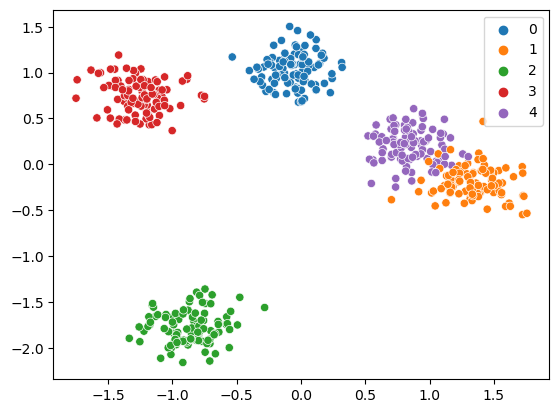

In [59]:

X_train, cats = make_blobs(n_samples = 500, centers = 5, random_state=42)
X_train = StandardScaler().fit_transform(X_train)

sns.scatterplot(x=[point[0] for point in X_train], y=[point[1] for point in X_train], hue=cats, palette='tab10')
plt.show()

In [60]:
def euclid(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [68]:
class KMeans:
    def __init__(self, k, max_iter=500):
        self.k = k
        self.max_iter = max_iter
        self.min_inter = float('inf')
        self.max_intra = float('-inf')
        self.dunn = 0
        self.melhor_dunn = float('-inf')
        

    def fit(self, X_train, show=False):
        self.min_inter = float('inf')
        self.max_intra = float('-inf')
        
        min, max = np.min(X_train, axis=0), np.max(X_train, axis=0)
        self.centroides = X_train[np.random.choice(range(len(X_train)), self.k)]
        prev_centroides = None
        iter = 0

        while np.not_equal(self.centroides, prev_centroides).any() and iter < self.max_iter:
            pontos_agrupados = [[] for _ in range(self.k)]

            for ponto in X_train:
                dists = euclid(ponto, self.centroides)
                centroide_proximo = np.argmin(dists)
                pontos_agrupados[centroide_proximo].append(ponto)

            prev_centroides = self.centroides
            self.centroides = [np.mean(cluster, axis=0) if cluster else self.centroides[i] for i, cluster in enumerate(pontos_agrupados)]


            for i, centroide in enumerate(self.centroides):
                if np.isnan(centroide).any():
                    self.centroides[i] = prev_centroides[i]

            iter += 1

            min_distance = np.min(pdist(self.centroides))

            if show:
                classe_centroides, classificacao = self.evaluate(X_train)
                sns.scatterplot(x=[point[0] for point in X_train], y=[point[1] for point in X_train], hue=classificacao, palette='tab10')
                plt.plot([x for x, _ in self.centroides], [y for _, y in self.centroides], '+', markersize=10)
                plt.title("iter: " + str(iter) + ", dunn: " + str(self.dunn))
                plt.show()
                
        self.dunn_index(X_train, self.centroides)
       
    

    def dunn_index(self, X, centroide):
        
        for ponto in X:
            dists = euclid(ponto, self.centroides)

            if(min(dists) > self.max_intra):
                self.max_intra = min(dists)
        
        min_distance = np.min(pdist(self.centroides))

        if min_distance < self.min_inter:
            self.min_inter = min_distance


        self.dunn = self.min_inter / (self.max_intra * 5)
        if(self.dunn > self.melhor_dunn):
                self.melhor_dunn = self.dunn

        # print("min_inter: ", self.min_inter, ", max_intra: ", self.max_intra, ", dunn: ", self.dunn)

    def evaluate(self, X):
        centroides = []
        centroide_ids = []
        
        
        for ponto in X:
            #print(len(centroides))
            if self.centroides==None:
                print("no centroides :(")
                continue
            dists = euclid(ponto, self.centroides)
            centroide_id = np.argmin(dists)

            centroides.append(self.centroides[centroide_id])
            centroide_ids.append(centroide_id)
      
        self.dunn_index(X, self.centroides)
        return centroides, centroide_ids
        
    def best(self, X_train, show=False):
        centroides= []
        self.melhores_centroides = None
        dunns = []
        prev_best = self.melhor_dunn
        
        for i in range(100):
            
            self.fit(X_train)
            dunns.append(self.dunn)
            # print("Melhor dunn: ", self.melhor_dunn, ", agora: ", dunns[i])
            centroides.append(self.centroides)
            if show and (dunns[i] > self.melhor_dunn):
                classe_centroides, classificacao = self.evaluate(X_train)
                sns.scatterplot(x=[point[0] for point in X_train], y=[point[1] for point in X_train], hue=classificacao, palette='tab10')
                plt.plot([x for x, _ in self.centroides], [y for _, y in self.centroides], '+', markersize=10)
                plt.title("iter: " + str(i) + ", dunn: " + str(dunns[i]) + ", melhor: " + str(self.melhor_dunn))
                plt.show()
            #print("Variancia: ", variancias_totais[i])
            if(prev_best != self.melhor_dunn):
                prev_best = self.melhor_dunn
                self.melhores_centroides = centroides[i]
                

In [69]:
kmeans = KMeans(k=5)
# kmeans.fit(X_train, show=True)


In [70]:
kmeans.best(X_train, show=True)


[array([-1.2540179 ,  0.74180127]), array([-0.86737536, -1.77642819]), array([-0.06366026,  1.03090423]), array([1.09252676, 0.00186135]), array([-1.28871366, -0.20460422])]


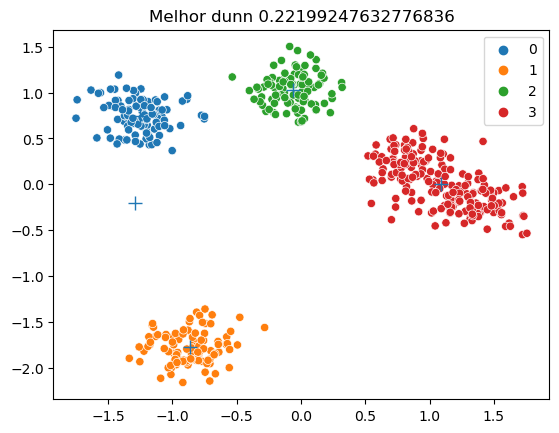

In [71]:
print(kmeans.melhores_centroides)
kmeans.centroides = kmeans.melhores_centroides
classe_centroides, classificacao = kmeans.evaluate(X_train)
sns.scatterplot(x=[point[0] for point in X_train], y=[point[1] for point in X_train], hue=classificacao, palette='tab10')
plt.plot([x for x, _ in kmeans.centroides], [y for _, y in kmeans.centroides], '+', markersize=10)
plt.title("Melhor dunn " + str(kmeans.melhor_dunn))
plt.show()

0.3554780310196353


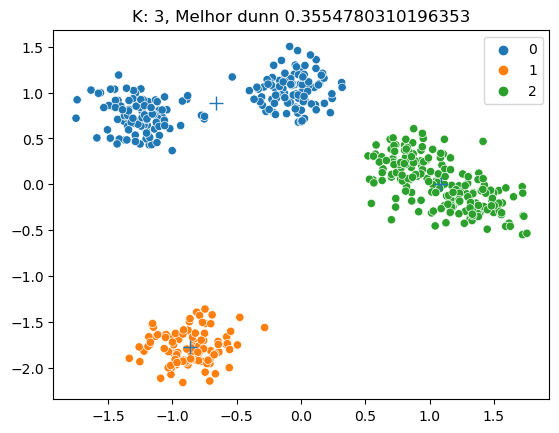

0.28713885386355686


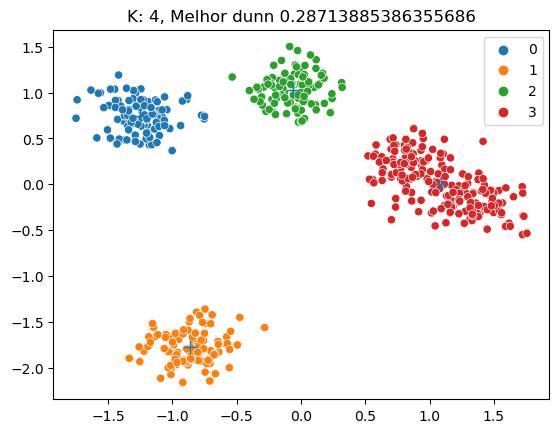

0.20524563137661558


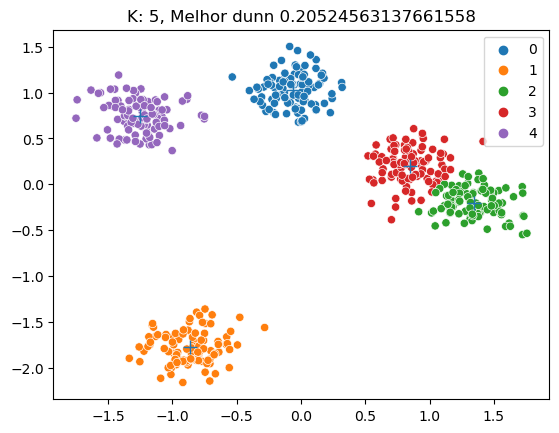

0.12321334864409451


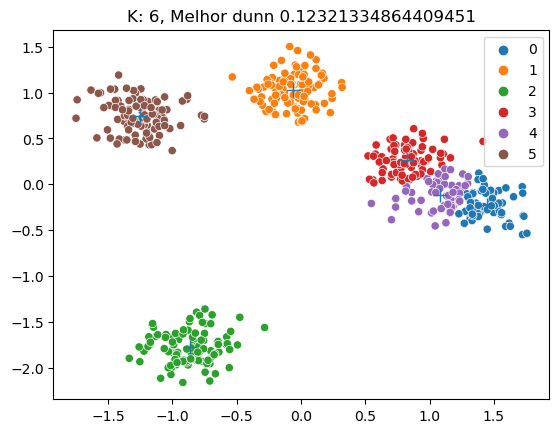

0.1174377970401049


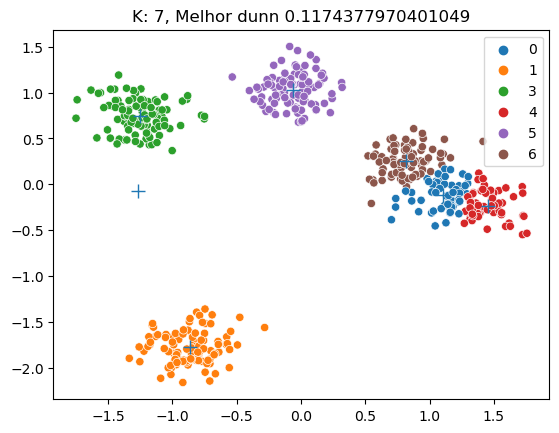

0.12347553940175122


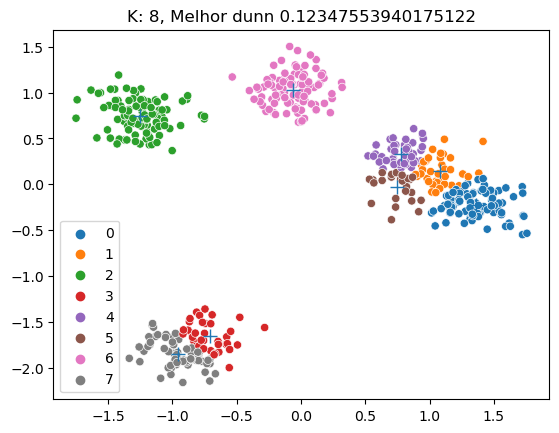

0.12128157054441743


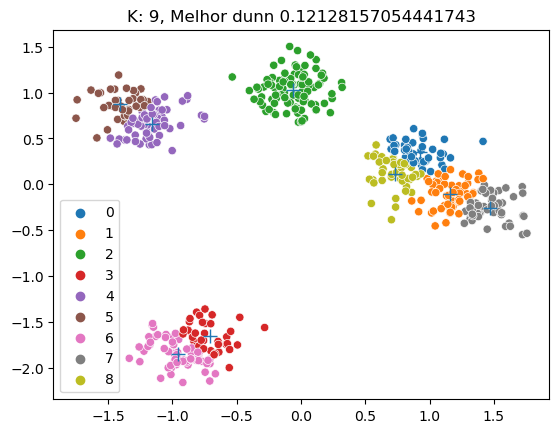

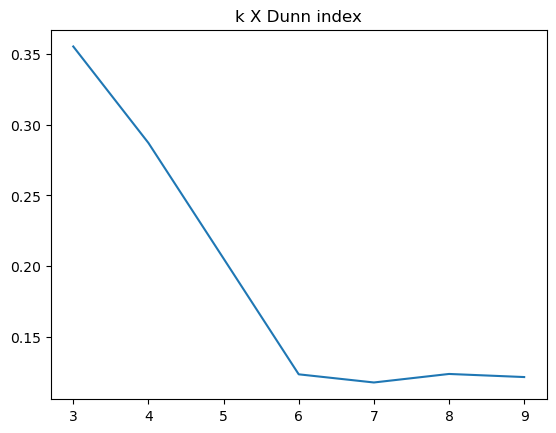

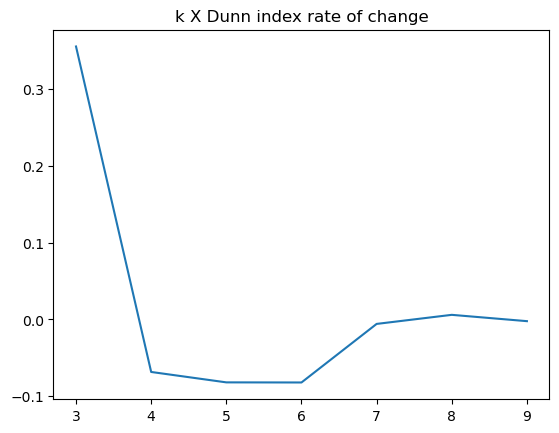

In [72]:
dunns = []
dunn_delta = []

for i in range(3, 10):
    cat = KMeans(k=i)
    cat.best(X_train)
    cat.centroides = cat.melhores_centroides
    classe_centroides, classificacao = cat.evaluate(X_train)
    sns.scatterplot(x=[point[0] for point in X_train], y=[point[1] for point in X_train], hue=classificacao, palette='tab10')
    plt.plot([x for x, _ in cat.centroides], [y for _, y in cat.centroides], '+', markersize=10)
    print(cat.melhor_dunn)
    plt.title("K: "+ str(i)+", Melhor dunn " + str(cat.melhor_dunn))
    plt.show()
    dunns.append(cat.melhor_dunn)

    if i==3:
        dunn_delta.append(dunns[i - 3])
    else:
        dunn_delta.append(dunns[i - 3] - dunns[i - 4])

plt.plot(range(3, 10), dunns)
plt.title("k X Dunn index")
plt.show()
plt.plot(range(3, 10), dunn_delta)
plt.title("k X Dunn index rate of change")
plt.show()